# House Market

Let's go a little further into python.

1. Download the four files “superficie.csv” / “nombre_de_sdb.csv” / “nombre_de_chambres.csv” / "house_price.csv"

2. Read the files and create the 4 corresponding Dataframes


In [ ]:
import pandas as pd 

In [ ]:
surface = pd.read_csv('src/house_market/superficie.csv', header = None)
bathrooms = pd.read_csv('src/house_market/nombre_de_sdb.csv', header = None)
rooms = pd.read_csv('src/house_market/nombre_de_chambres.csv', header = None)
house_price = pd.read_csv('src/house_market/house_price.csv', index_col=0)

3. Give a column name to the three datasets that don't have a header in the source file

In [ ]:
surface.columns = ['id', 'surface']
bathrooms.columns = ['id','bathrooms']
rooms.columns = ['id', 'rooms']

In [ ]:
surface.head()

,id,surface
0,0,28844
1,1,27667
2,2,14742
3,3,28089
4,4,11713


In [ ]:
bathrooms.head()

,id,bathrooms
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1


In [ ]:
rooms.head()

,id,rooms
0,0,1
1,1,4
2,2,1
3,3,4
4,4,2


In [ ]:
house_price.head()

,id,house_price
0,14,1918154.0
1,30,739142.0
2,70,1621938.0
3,77,1319862.0
4,50,146250.0


4. Make an inner join of these four datasets into a single dataframe. 

In [ ]:
dataset = surface.merge(bathrooms, on='id').merge(rooms, on='id').merge(house_price, on='id') # see documentation : merge performs an inner join by default

5. What is the average surface area of the houses in our dataset?

In [ ]:
dataset['surface'].mean()

20439.77

6. What is the median and average number of rooms?

In [ ]:
print("The average number of room is {}, and the median number is {}"
      .format(dataset['rooms'].mean(), dataset['rooms'].median()))

The average number of room is 2.42, and the median number is 2.0


7. What is the average cost of a house?

In [ ]:
dataset['house_price'].mean()

767747.87

8. What is the average cost of a house, depending on the number of rooms it has?

In [ ]:
dataset.groupby('rooms')['house_price'].mean()

rooms
1    980774.869565
2    642086.258065
3    645904.592593
4    888045.631579
Name: house_price, dtype: float64

10. The average cost per room doesn't tell us much. Let's try to categorize by size.

  - Create a new column in your dataset that we'll call home_size
Create three categories that respectively correspond to :

      - "very large" == "a house larger than 25,000 sqrt_feet"
      
      - "large" == "a house between 20,000 and 25,000 sqrt_feet"
      
      - "medium" == "a house between 15,000 and 20,000 sqrt_feet"
    
      - "small" == "a house between 10,000 and 15,000 sqrt_feet" 
    
      - "very small" == a house less than 10,000 sqrt_feet"
      
Fill in the corresponding rows in the house_size column.

In [ ]:
dataset['house_size'] = dataset['surface'].apply(lambda x : 'very large' if x > 25000
                                                      else 'large' if (x > 20000) and (x <= 25000)
                                                      else 'medium' if (x > 15000) and (x <= 20000)
                                                      else 'small' if (x > 10000) and (x <= 15000)
                                                      else 'very small')
display(dataset)

,id,surface,bathrooms,rooms,house_price,house_size
0,0,28844,2,1,1421908.0,very large
1,1,27667,1,4,1305091.0,very large
2,2,14742,1,1,164373.0,small
3,3,28089,3,4,1441714.0,very large
4,4,11713,1,2,108290.0,small
...,...,...,...,...,...,...
95,95,11417,3,3,132599.0,small
96,96,12126,1,2,155828.0,small
97,97,16390,1,2,237061.0,medium
98,98,23738,1,2,976422.0,large


11. What is the average cost of a house depending on its size category?


In [ ]:
dataset.groupby('house_size')['house_price'].mean()

house_size
large         7.325385e+05
medium        3.256948e+05
small         1.561387e+05
very large    1.552456e+06
Name: house_price, dtype: float64

 12. Apply the code below to view your result. What can you conclude?

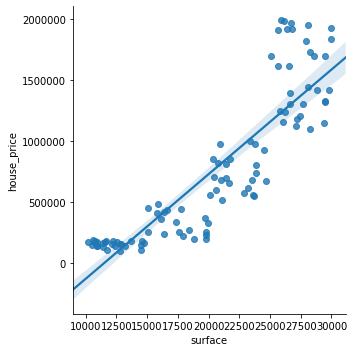

In [ ]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x = "surface", y="house_price", data = dataset)

We can see on the graph that the more the surface area of a house rises, the more its price rises. So there is a fairly strong linear correlation between these two variables. 